<a href="https://colab.research.google.com/github/Piyumi22/XAI/blob/main/SHAP_example_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
# Import necessary packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [27]:
# from google.colab import drive
# drive.mount('/content/drive')

In [28]:
# Step 1: Load the dataset from GitHub
github_url = "https://raw.githubusercontent.com/Piyumi22/XAI/main/diabetes.csv"
df = pd.read_csv(github_url)

# Display the first few rows
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



When you set the random_state value, you are telling the program to use the same sequence of random numbers every time it runs. This makes the results consistent and reproducible.

In [29]:
df = df.dropna()  # Drop missing values

In [30]:
# Step 2: Define features (X) and target (y)
# X contains all columns except the last one (features).
# y contains only the last column, which is the target variable ('Outcome').
X = df.iloc[:, :-1]  # Select all rows and all columns except the last
y = df.iloc[:, -1]   # Select all rows and only the last column

# Step 3: Split the dataset into training and testing sets
# Using 75% of the data for training and 25% for testing.
# Setting a fixed random_state ensures reproducibility of the split.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Step 4: Initialize the XGBoost classifier
# The `random_state` parameter ensures that the model's behavior is deterministic and reproducible.
from xgboost import XGBClassifier
model = XGBClassifier(random_state=42)

# Step 5: Train the XGBoost classifier on the training set
# The `.fit()` method trains the model using the training features (X_train) and the target (y_train).
model.fit(X_train, y_train)

# Step 6: Evaluate the model on the testing set
# The `.score()` method computes the accuracy of the model on the testing set (X_test and y_test).
# Accuracy is the proportion of correctly classified samples.
score = model.score(X_test, y_test)

# Print the accuracy score
print(f"Model Accuracy: {score:.2f}")  # Display the model's performance as a percentage


Model Accuracy: 0.79


##SHAP

In [51]:
# Import the SHAP library
import shap  # SHAP (SHapley Additive exPlanations) is used for model interpretability

# Step 1: Initialize the SHAP TreeExplainer
# TreeExplainer is specifically designed for tree-based models like XGBoost, LightGBM, or Random Forest.
# It takes the trained model as input to compute SHAP values.
explainer = shap.TreeExplainer(model)

# Step 2: Compute SHAP values for the input data
# SHAP values explain the contribution of each feature to the model's predictions.
# Here, `X` is the input dataset (can be training or test data).
shap_values = explainer.shap_values(X)




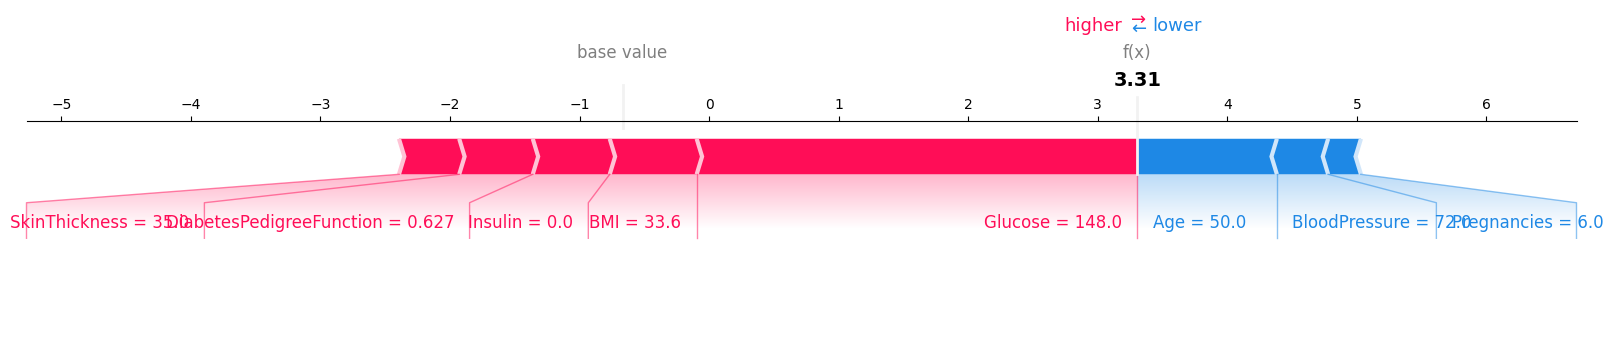

In [57]:
# Step 3: Generate a force plot for a single prediction
# Force plots are used to visualize the impact of each feature on a specific prediction.
# - `explainer.expected_value`: The base value or average prediction of the model.
# - `shap_values[0, :]`: The SHAP values for the first sample in the dataset.
# - `X_test.iloc[0, :]`: The feature values of the first sample from the test dataset.
shap.force_plot(explainer.expected_value, shap_values[0, :], X.iloc[0, :], matplotlib=True)



Note:
 - The force plot shows how features push the prediction above or below the base value.
- Positive SHAP values push the prediction higher, while negative SHAP values push it lower.
 - `matplotlib=True` might be needed if running this code in Colab or Jupyter to render the plot.

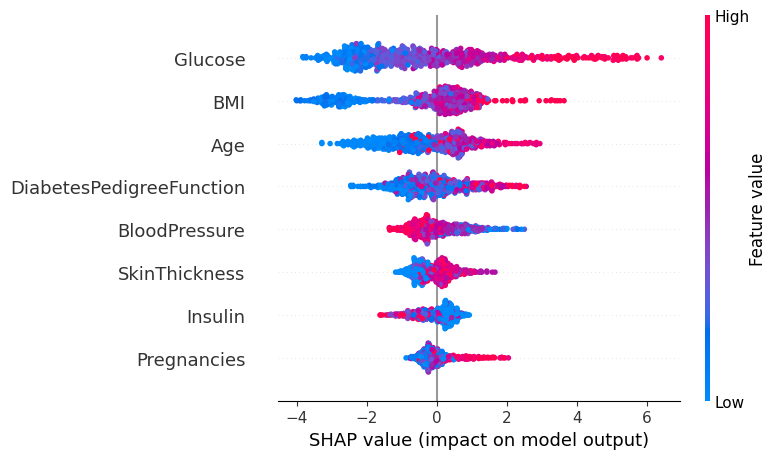

In [58]:
# Explain predictions using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# Visualize the explanations
# Summary plot
shap.summary_plot(shap_values, X, feature_names=X.columns)



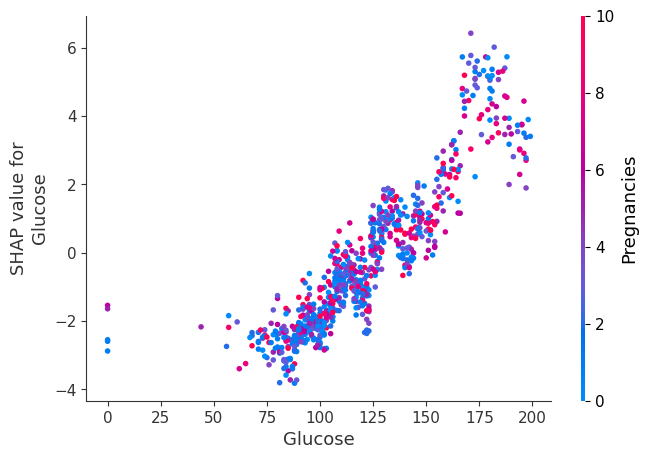

In [59]:
# Dependence plot for a specific feature
shap.dependence_plot("Glucose", shap_values, X)

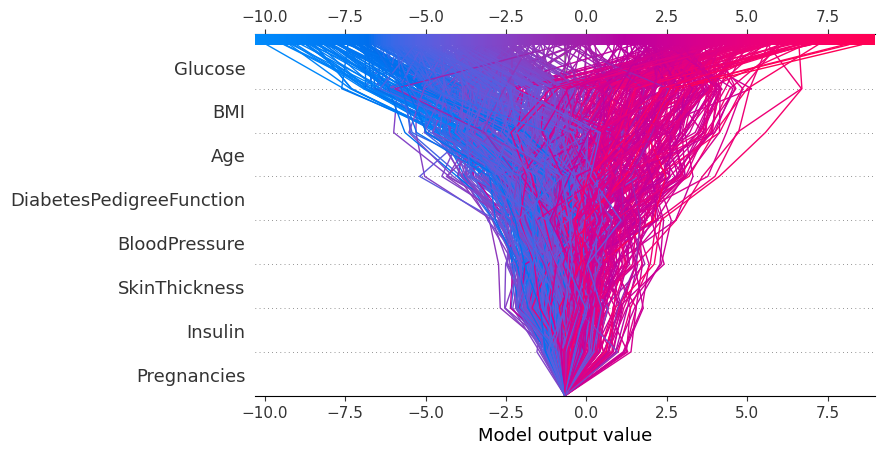

In [60]:
# Step 7: Decision plot (Optional, if using a tree-based model)
shap.decision_plot(explainer.expected_value, shap_values, X)

In [56]:
# # Import required libraries
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# import shap
# import matplotlib.pyplot as plt

# # Step 1: Load the dataset from GitHub
# github_url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
# data = pd.read_csv(github_url)

# # Step 2: Preprocess the dataset
# # Selecting features and target
# features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex']
# data = data.dropna()  # Drop missing values
# data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})  # Encode categorical variable
# X = data[features]
# y = data['Survived']

# # Step 3: Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Step 4: Train a machine learning model
# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

# # Step 5: Explain predictions using SHAP
# explainer = shap.TreeExplainer(model)
# shap_values = explainer.shap_values(X_test)

# # Step 6: Visualize the explanations
# # Summary plot
# shap.summary_plot(shap_values[1], X_test, feature_names=features)

# # Dependence plot for a specific feature
# shap.dependence_plot("Age", shap_values[1], X_test)

# # Step 7: Decision plot (Optional, if using a tree-based model)
# shap.decision_plot(explainer.expected_value[1], shap_values[1], X_test)


##Partial Dependence Plots
It’s one of the simplest methods to understand how different features interact with each other and with the target. In this method, we change the value of one feature, while keeping others constant and observe the change in the dependent target.

This method allows us to identify regions where the change in feature values has a crucial impact on the prediction.

The Python partial dependence plot toolbox or PDPbox is a package that provides functions to visualize these. In the same case of diabetes prediction, let us see how to plot partial dependence plots for a single feature:

In [62]:
# Define feature names
# A list of feature names corresponding to the columns in the dataset.
# These names are used to reference features for Partial Dependence Plots (PDP).
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure',
                 'SkinThickness', 'Insulin', 'BMI',
                 'DiabetesPedigreeFunction', 'Age']

# Import necessary modules
# pdpbox is used for creating Partial Dependence Plots to understand how features affect the model predictions.
from pdpbox import pdp, get_dataset, info_plots

# Plot PDP for a single feature
# pdp_isolate computes the Partial Dependence function for a specific feature.
# - `model`: The trained XGBoost classifier.
# - `dataset`: The test dataset (X_test) to analyze the model's behavior.
# - `model_features`: The list of feature names to match with the dataset.
# - `feature`: The specific feature to analyze ('Glucose' in this case).
pdp_goals = pdp.pdp_isolate(model=model, dataset=X_test,
                            model_features=feature_names,
                            feature='Glucose')

# Plot the Partial Dependence Plot for the selected feature
# pdp_plot visualizes the relationship between the selected feature ('Glucose') and the model's predictions.
pdp.pdp_plot(pdp_goals, 'Glucose')

# Show the plot
# plt.show() displays the plot generated by pdp_plot.
import matplotlib.pyplot as plt  # Ensure you import matplotlib for this
plt.show()


ModuleNotFoundError: No module named 'pdpbox'